# Using Spark

## Introduction

In this demo we will show how to work with Spark from a Jupyter node like this machine. On this Jupyter node, a Spark client is already installed and configured to work with a Spark cluster, so all you need to do is to call the right packages and call the right commands.


## Apache Spark

Apache Spark (or Spark for short) is an computing cluster framework, introduced by UC Berkeley, later becomes an Apache programme. It provides large scale distributed data processing. It is mostly compared with Apache Hadoop, since it is developed to with the MapReduce principal, but adds interactive data query and get in-memory processing and is able to get near real-time analytics. Spark can also use HDFS as storage backend for its Resilient Distributed Dataset (RDD).

## Spark and Python

Spark exposes its functions in a variety of languages: Java, Scala, Python and R. In this notebook we uses Python on Spark (pySpark).

There are two way to use pySpark: call directly the pySpark programme, which is a Python with pre-embedded library, or call pySpark libraries from a normal Python code, which we are doing in this notebook. 

In the remaining parts of this notebook, I will show how to create a spark context that connects to the Spark cluster from the pyspark library, pass a job to it and execute the job.

## Calling Spark from Python script

### 1. Set up the Spark Home

First we have to specify *SPARK_HOME* to the folder that installs spark, if it is not already in environment (like this notebook).

In the current node Spark is installed at /opt/spark


In [1]:
import sys
print sys.path

['', '/opt/spark/python', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/usr/local/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages', '/usr/local/lib/python2.7/dist-packages/IPython/extensions', '/home/demo/.ipython']


### 2. Add pyspark library folder in to sys.path

The Next part of the python script is to set up the environment for calling Spark context. Contrarily to the scripts provided with the installation of Spark which automatically generate all the environment, configuration and create a Spark context, this notebook starts from a blank python installation. Thus, it does not contain the necessary path or environment necessary for creating a Spark Context.

Two folders need to be added: $SPARK_HOME/python/lib/py4j-0.9-src.zip and $SPARK_HOME/python
This node has spark installed on /opt/spark, thus we have to add /opt/spark/python/lib/py4j-0.9-src.zip, /opt/spark/python to sys.path

In [2]:
import sys

# Popup the current folder in sys.path
if (len(sys.path) >  0):
    sys.path.pop(0)
pythonpath = ['', '/opt/spark/python/lib/py4j-0.9-src.zip', '/opt/spark/python']
pythonpath.extend(sys.path)
sys.path = pythonpath

### 3. Create Spark Context object

Now that the environment is set up, we can create a Spark Context. The most important parameter is *master* which tells which Spark cluster to connect your Spark Context object to.

- *master* = *local* by default, which does not connect your Spark Context object to any Spark cluster, but use localhost for all Spark jobs.
- *master* = *spark://host:port* tells Spark Context object to connect to a Spark Master in a Spark cluster using its IP and port
- *master* = *yarn-client* will tell Spark Context object to connect to a Yarn Resource Manager. Spark will search for Yarn configuration in the Hadoop client configuration of the current node. It is the set up of our current node. There is a Cloudera cluster which exposes Spark API via SPARK_ON_YARN service. All necessary Hadoop configuration is already done on this node to connect to the Cloudera cluster.

In [3]:
from pyspark.context import SparkContext
sc = SparkContext(master='yarn-client', appName='test_python')

### 4. Play with Spark

Let's do a simple job - Wordcount - that will count the number of a word appearing in a file. We will start by testing if our Spark context can read/write on the cluster's HDFS.

In [4]:
f = sc.textFile('big.txt')
wcount = f.flatMap(lambda line: line.split(' ')).map(lambda x: (x,1)).reduceByKey(lambda a,b: a+b)

The first command loads the file 'big.txt' on HDFS. The second command is combined of a series of Map and Reduce steps, which actually count the number of occurrence for each word in the file. The first five results are:

In [5]:
wcount.take(5)

[(u'', 69285), (u'gag', 1), (u'worn,"', 1), (u'"Fool,', 1), (u'Dartmouth,', 1)]

Now we can sort the results and take the most occurent words.

In [6]:
wsort = wcount.sortBy(lambda x: x[1], ascending=False)
results = wsort.take(10)
print results

[(u'the', 71744), (u'', 69285), (u'of', 39169), (u'and', 35968), (u'to', 27895), (u'a', 19811), (u'in', 19515), (u'that', 11216), (u'was', 11129), (u'his', 9561)]


### 5. Show the result in nice figure

Using Matplotlib library, we can show the result in a nice figure, with X-axis contains the most occurent words, and the Y-axis contains the number of occurence of each word.

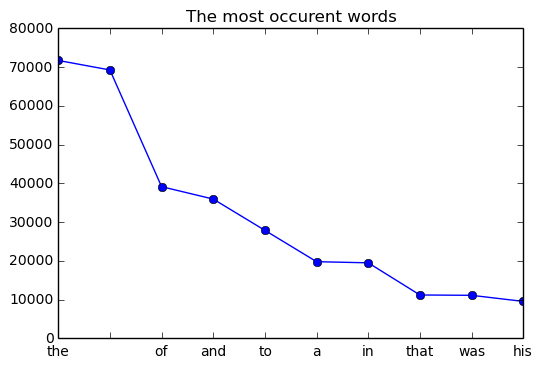

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
x = [r[0] for r in results]
y = [r[1] for r in results]
xray = range(len(x))
plt.xticks(xray,x)
plt.plot(xray,y, 'b-o')
plt.title('The most occurent words')
plt.show()

Finally close the Spark context in a clean way.

In [8]:
sc.stop()